In [1]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [2]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.3)


In [3]:
##Import the requred libraries

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot
from  sklearn.metrics import  mean_squared_error
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pd.__version__

'1.2.3'

In [5]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [6]:
# # #Import csv file to colab
# from google.colab import files
# uploaded = files.upload()

**bold text**# 1. Read the data as an appropriate Time Series data and plot the data.


# 1. Read the data as an appropriate Time Series data and plot the data.


## Method 1:

In [7]:
df_1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)

# index_col -> can be used to force pandas to use the first column as the index

# squeeze : bool -> To notify Pandas that you're using a TS object and NOT a dataframe

# parse_dates : boolean (True) -> try parsing the index. 

In [8]:
df_1.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [9]:
df_1.tail()

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

In [10]:
print(df_1.dtype)
print(df_1.shape)

float64
(187,)


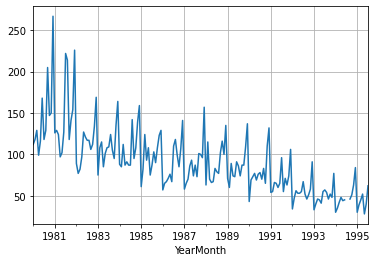

In [11]:
df_1.plot();
plt.grid()

## Method 2:

In [12]:
df_2 = pd.read_csv("Rose.csv")

In [13]:
df_2.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


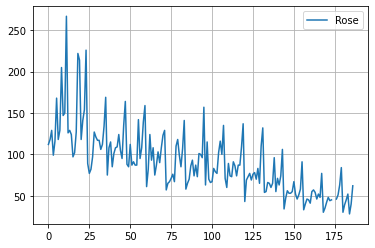

In [15]:
df_2.plot();
plt.grid()

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

In [16]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data. Please refer to the following documentation of the 'date_range' functionality in Pandas from $\href{https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html}{here}$.

In [17]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [18]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


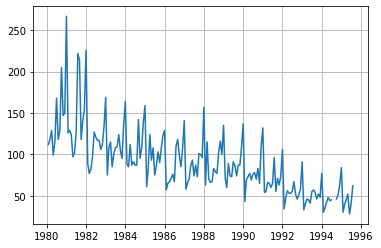

In [19]:
plt.plot(df_2['Time_Stamp'],df_2['Rose']);
plt.grid()

## Method 3:

In [20]:
df_3 = pd.read_csv("Rose.csv")

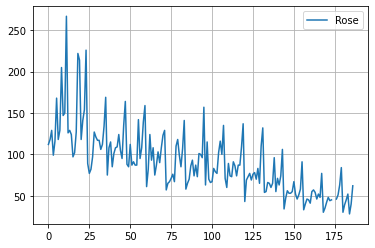

In [21]:
df_3.plot();
plt.grid()

In [22]:
from datetime import datetime

In [23]:
df_3['YearMonth'] = pd.to_datetime(df_3['YearMonth'], infer_datetime_format = True)

In [24]:
df_3.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [25]:
indexed_df = df_3.set_index(['YearMonth'])

In [26]:
indexed_df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


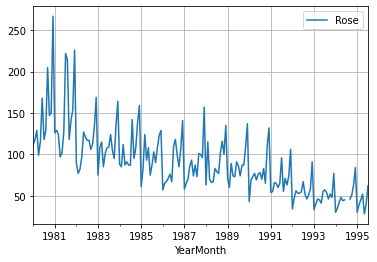

In [27]:
indexed_df.plot();
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [28]:
df_1.describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

In [29]:
quarterly=df_1.resample('Q').sum()
quarterly.head()

YearMonth
1980-03-31    359.0
1980-06-30    383.0
1980-09-30    452.0
1980-12-31    564.0
1981-03-31    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

## Plot a year on year boxplot for the Wine production.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



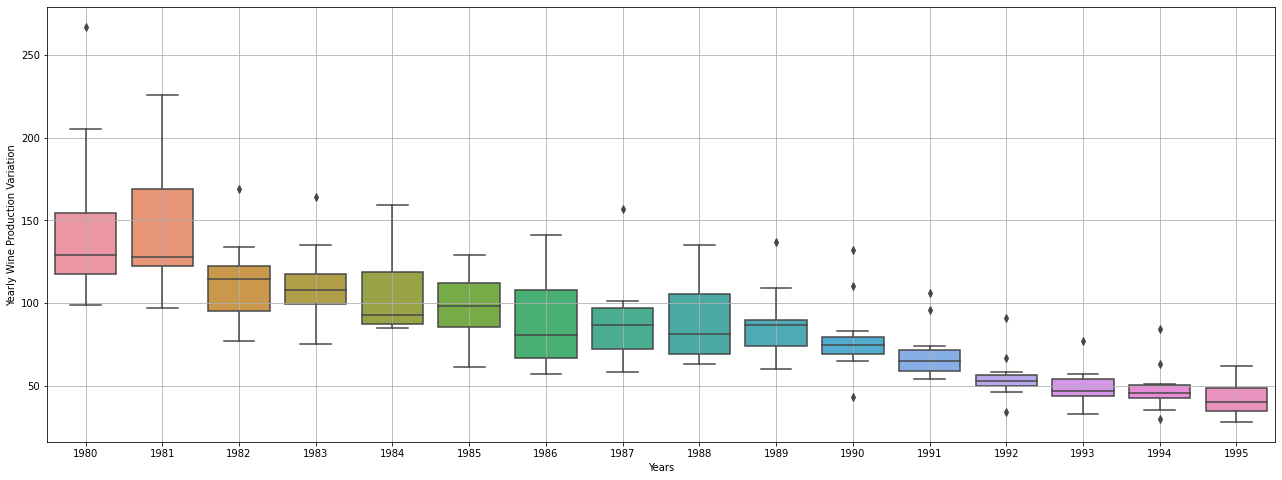

In [30]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

## Plot a monthly boxplot for the Wine production taking all the years into account

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



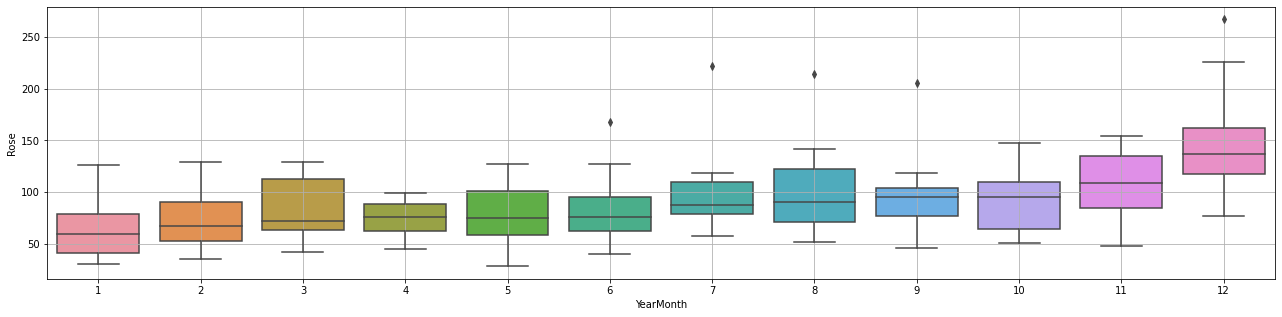

In [31]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

## Plot a monthplot of the give Time Series.

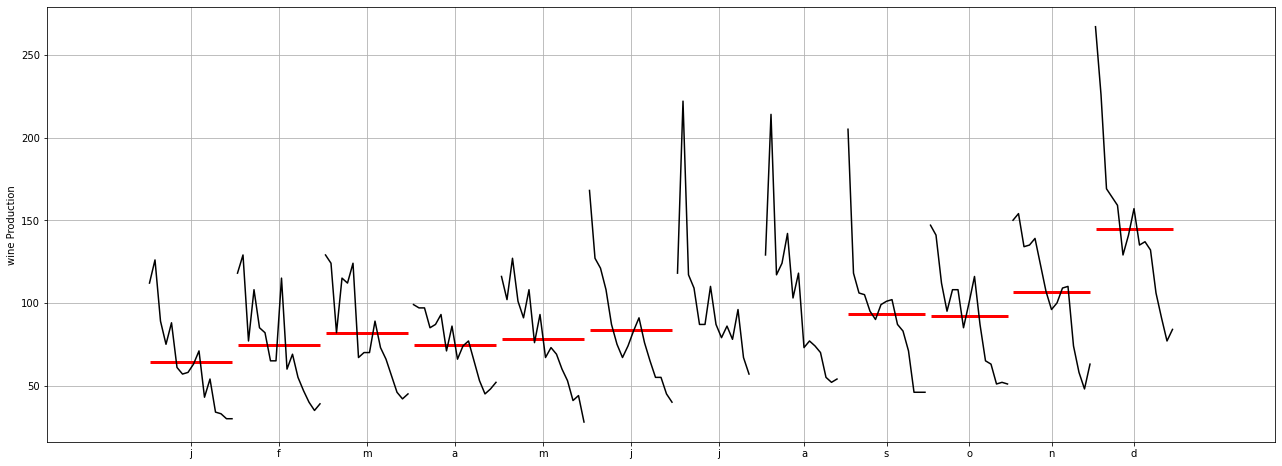

In [32]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='wine Production',ax=ax)
plt.grid();

## Plot the Time Series according to different months for different years.

In [33]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [34]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [35]:
df_2['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

In [36]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Rose', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


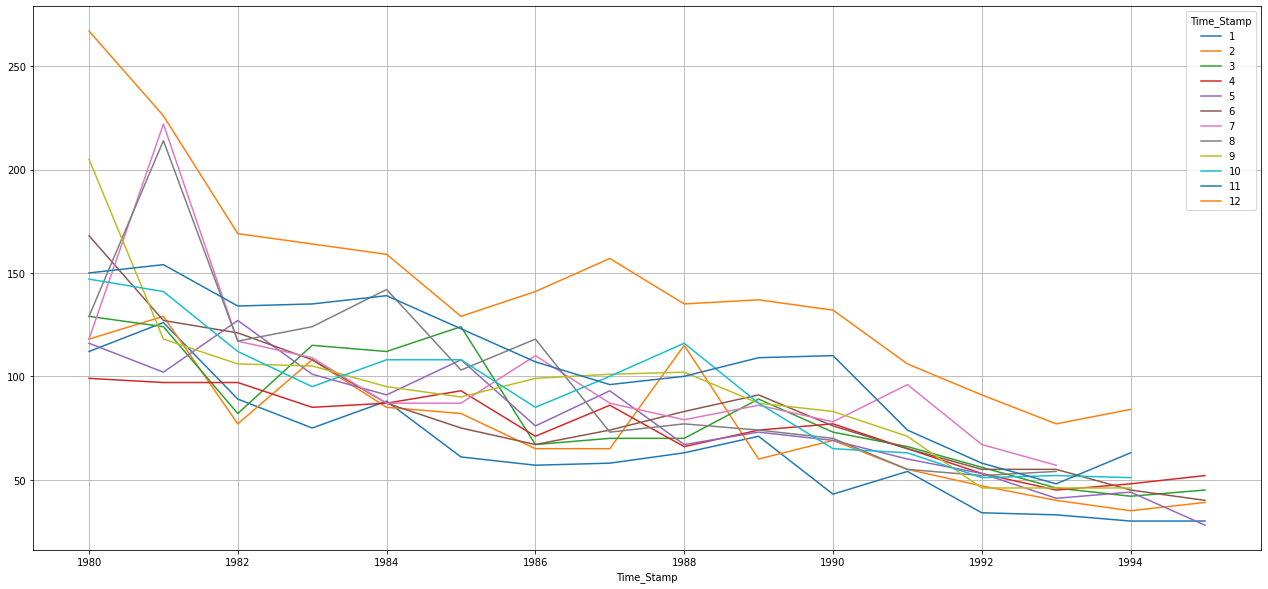

In [37]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

## Reading the monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.




```
# This is formatted as code
```

#### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [38]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    1758.0
1981-12-31    1780.0
1982-12-31    1348.0
1983-12-31    1324.0
1984-12-31    1280.0
Freq: A-DEC, Name: Rose, dtype: float64

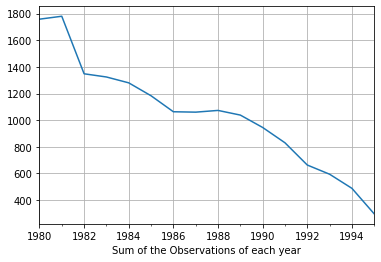

In [39]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [40]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    146.500000
1981-12-31    148.333333
1982-12-31    112.333333
1983-12-31    110.333333
1984-12-31    106.666667
Freq: A-DEC, Name: Rose, dtype: float64

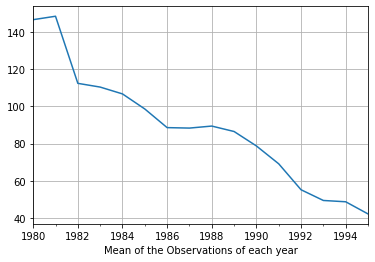

In [41]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

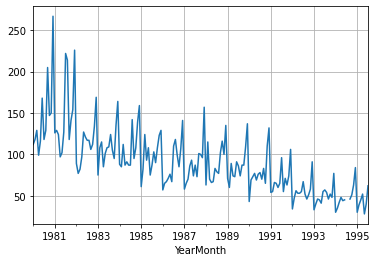

In [42]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

#### Quarterly Plot

In [43]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    359.0
1980-06-30    383.0
1980-09-30    452.0
1980-12-31    564.0
1981-03-31    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

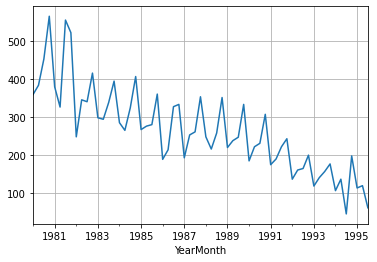

In [44]:
df_quarterly_sum.plot();
plt.grid()

In [45]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Rose, dtype: float64

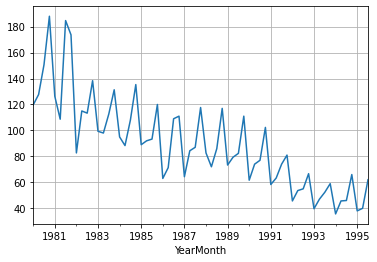

In [46]:
df_quarterly_mean.plot();
plt.grid()

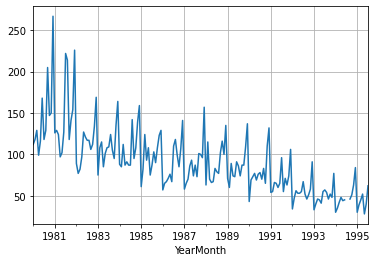

In [47]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

#### Decade Plot

In [48]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     1758.0
1990-12-31    12094.0
2000-12-31     2871.0
Freq: 10A-DEC, Name: Rose, dtype: float64

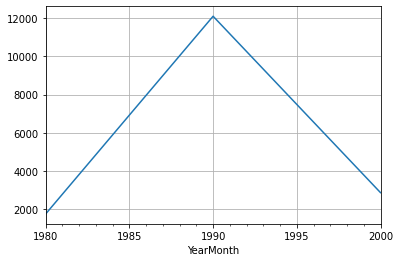

In [49]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

## Decomposition

### Handling Missing values

In [50]:
df_1.isna().sum()

2

In [51]:
indexes = [index for index,element in enumerate(df_1) if np.isnan(element)]
indexes

[174, 175]

In [52]:
df_1['1994']

YearMonth
1994-01-01    30.0
1994-02-01    35.0
1994-03-01    42.0
1994-04-01    48.0
1994-05-01    44.0
1994-06-01    45.0
1994-07-01     NaN
1994-08-01     NaN
1994-09-01    46.0
1994-10-01    51.0
1994-11-01    63.0
1994-12-01    84.0
Name: Rose, dtype: float64

In [53]:
df_1['1994'].interpolate()['1994'].tail()

YearMonth
1994-08-01    45.666667
1994-09-01    46.000000
1994-10-01    51.000000
1994-11-01    63.000000
1994-12-01    84.000000
Name: Rose, dtype: float64

In [54]:
df_1['1994-07-01'] = 45.666667
df_1['1994-08-01'] = 45.666667
df_1['1994']

YearMonth
1994-01-01    30.000000
1994-02-01    35.000000
1994-03-01    42.000000
1994-04-01    48.000000
1994-05-01    44.000000
1994-06-01    45.000000
1994-07-01    45.666667
1994-08-01    45.666667
1994-09-01    46.000000
1994-10-01    51.000000
1994-11-01    63.000000
1994-12-01    84.000000
Name: Rose, dtype: float64

### Additive Model

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

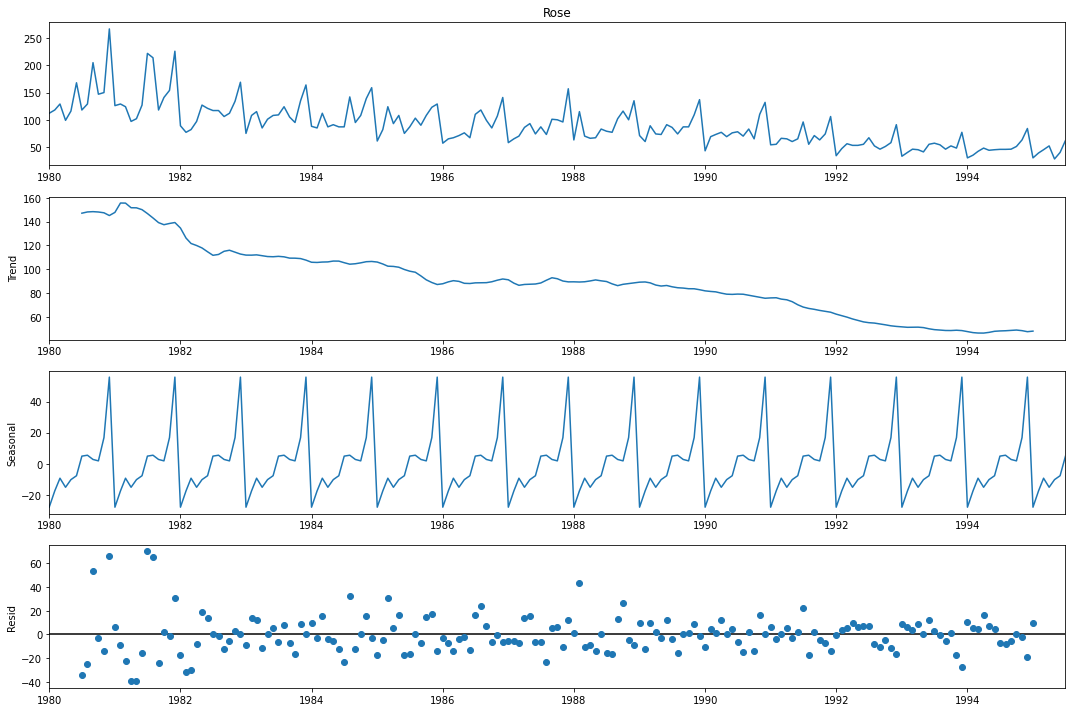

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a decreasing trend the data. There is a seasonality as well.

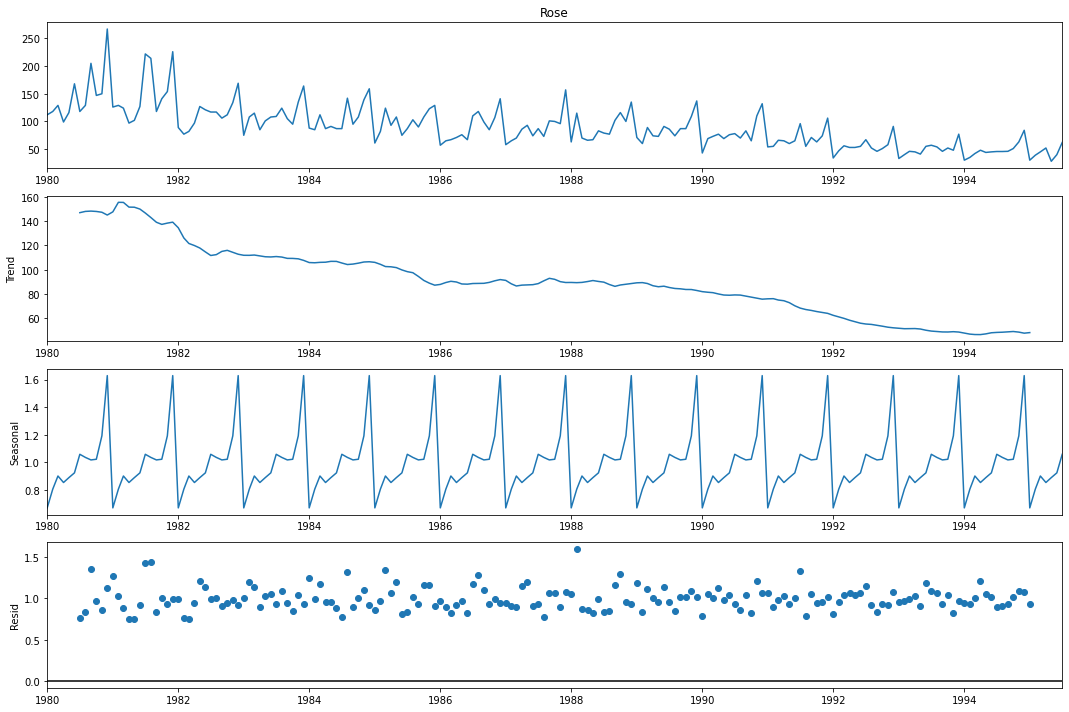

In [57]:
decomposition = seasonal_decompose(df_1,model='multiplicative')
decomposition.plot();

In [58]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [59]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670088
1980-02-01    0.806133
1980-03-01    0.901128
1980-04-01    0.853982
1980-05-01    0.889377
1980-06-01    0.923948
1980-07-01    1.058465
1980-08-01    1.035847
1980-09-01    1.017614
1980-10-01    1.022536
1980-11-01    1.192301
1980-12-01    1.628581
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.757953
1980-08-01    0.840748
1980-09-01    1.357719
1980-10-01    0.970806
1980-11-01    0.853412
1980-12-01    1.129691
Name: resid, dtype: fl

In [60]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.841286
1980-08-01    148.965748
1980-09-01    149.732719
1980-10-01    149.054140
1980-11-01    148.270079
1980-12-01    146.254691
dtype: float64

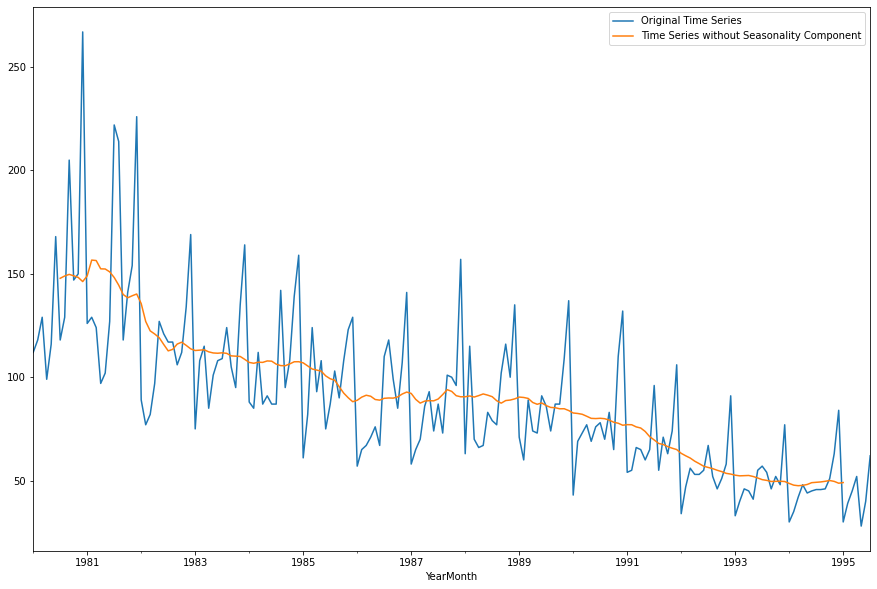

In [61]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [62]:
deaseasonalized_ts1 = trend
deaseasonalized_ts1.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64

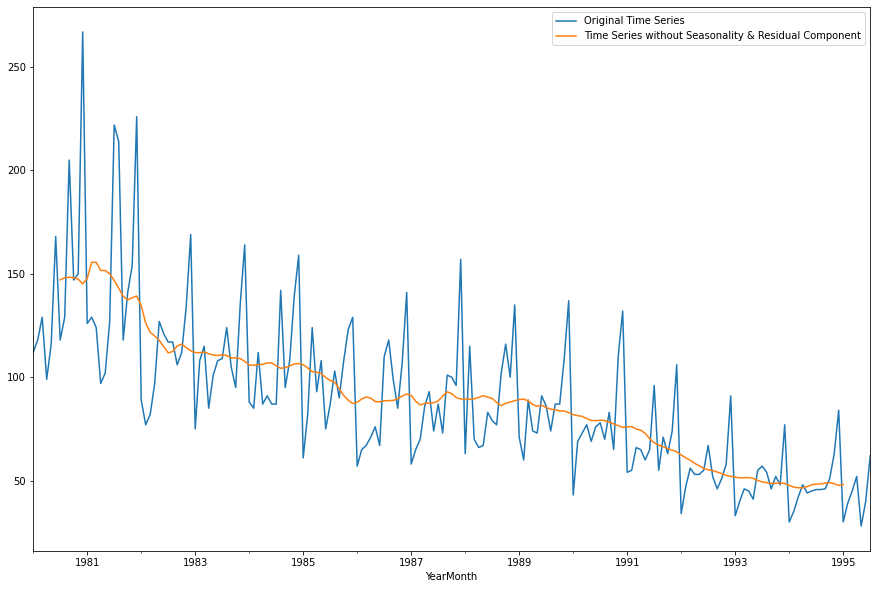

In [63]:
df_1.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality & Residual Component"]);

# 3. Split the data into training and test. The test data should start in 1991.


In [64]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

In [65]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [66]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

Last few rows of Training Data


YearMonth
1990-08-01     70.0
1990-09-01     83.0
1990-10-01     65.0
1990-11-01    110.0
1990-12-01    132.0
Name: Rose, dtype: float64

First few rows of Test Data


YearMonth
1991-01-01    54.0
1991-02-01    55.0
1991-03-01    66.0
1991-04-01    65.0
1991-05-01    60.0
Name: Rose, dtype: float64

Last few rows of Test Data


YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

In [67]:
print(train.shape)
print(test.shape)

(132,)
(55,)


#4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


## 1. SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [68]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [69]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [70]:
## Let us check the parameters

model_SES_autofit.params

{'damping_trend': nan,
 'initial_level': 134.38704806164168,
 'initial_seasons': array([], dtype=float64),
 'initial_trend': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09874982660106467,
 'smoothing_seasonal': nan,
 'smoothing_trend': nan,
 'use_boxcox': False}

In [71]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

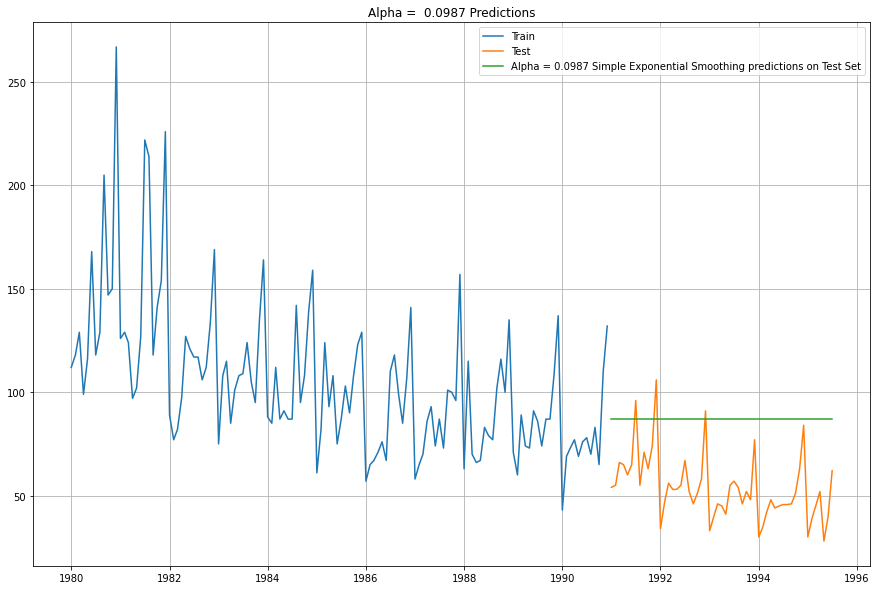

In [72]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha = 0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =  0.0987 Predictions');

In [73]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [74]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values))

SES RMSE: 36.78938699298598
SES RMSE (calculated using statsmodels): 36.78938699298598


In [75]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)]},index=['Alpha= 0.0987,SES'])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing


In [76]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.005627395225399259, 'smoothing_trend': 6.722744943479034e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.53777460719618, 'initial_trend': -0.4905093549686182, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [77]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.357791
1991-02-01    71.867286
1991-03-01    71.376780
1991-04-01    70.886275
1991-05-01    70.395769
1991-06-01    69.905264
1991-07-01    69.414758
1991-08-01    68.924253
1991-09-01    68.433748
1991-10-01    67.943242
1991-11-01    67.452737
1991-12-01    66.962231
1992-01-01    66.471726
1992-02-01    65.981220
1992-03-01    65.490715
1992-04-01    65.000209
1992-05-01    64.509704
1992-06-01    64.019199
1992-07-01    63.528693
1992-08-01    63.038188
1992-09-01    62.547682
1992-10-01    62.057177
1992-11-01    61.566671
1992-12-01    61.076166
1993-01-01    60.585661
1993-02-01    60.095155
1993-03-01    59.604650
1993-04-01    59.114144
1993-05-01    58.623639
1993-06-01    58.133133
1993-07-01    57.642628
1993-08-01    57.152122
1993-09-01    56.661617
1993-10-01    56.171112
1993-11-01    55.680606
1993-12-01    55.190101
1994-01-01    54.699595
1994-02-01    54.209090
1994-03-01    53.718584
1994-04-01    53.228079
1994-05-01    52.737574
1994-06-01    52

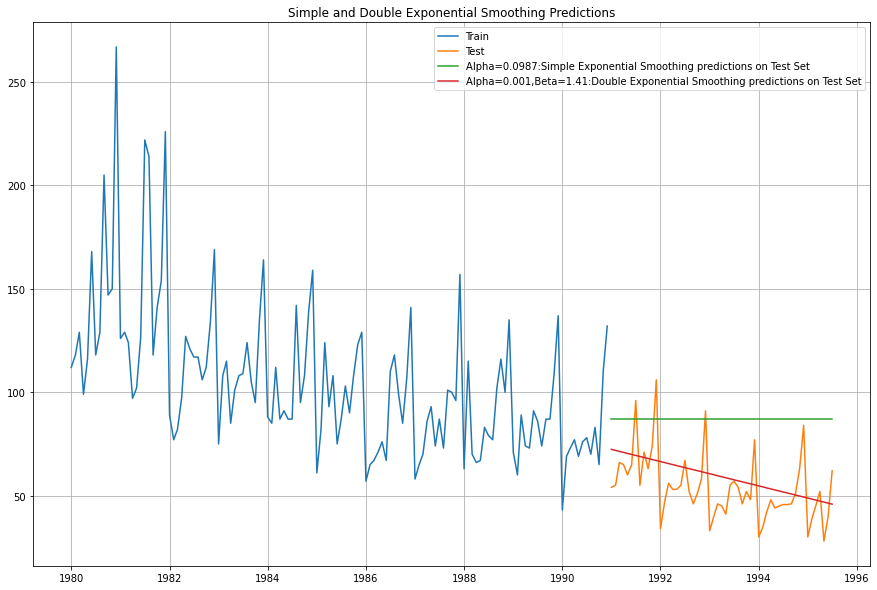

In [78]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0987:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.001,Beta=1.41:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [79]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.392516930847503


In [80]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.001,Beta=1.41:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517


### Inference

Here, we see that the Double Exponential Smoothing has actually done poor when compared to the Simple Exponential Smoothing. 

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [81]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09247995167383646, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 147.1251209143706, 'initial_trend': -0.5503329642408892, 'initial_seasons': array([-31.99085126, -19.51359677, -11.31406667, -21.57574971,
       -12.21264592,  -6.5948571 ,   3.15000859,   8.96777153,
         4.77567092,   3.09390942,  21.52051931,  63.56076615]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [82]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     41.703704
1991-02-01     53.630626
1991-03-01     61.279823
1991-04-01     50.467807
1991-05-01     59.280578
1991-06-01     64.348034
1991-07-01     73.542566
1991-08-01     78.809996
1991-09-01     74.067563
1991-10-01     71.835468
1991-11-01     89.711745
1991-12-01    131.201659
1992-01-01     35.099709
1992-02-01     47.026630
1992-03-01     54.675827
1992-04-01     43.863811
1992-05-01     52.676582
1992-06-01     57.744038
1992-07-01     66.938571
1992-08-01     72.206001
1992-09-01     67.463567
1992-10-01     65.231473
1992-11-01     83.107750
1992-12-01    124.597664
1993-01-01     28.495713
1993-02-01     40.422635
1993-03-01     48.071832
1993-04-01     37.259816
1993-05-01     46.072587
1993-06-01     51.140043
1993-07-01     60.334575
1993-08-01     65.602005
1993-09-01     60.859572
1993-10-01     58.627477
1993-11-01     76.503754
1993-12-01    117.993668
1994-01-01     21.891718
1994-02-01     33.818639
1994-03-01     41.467836
1994-04-01     30.655820


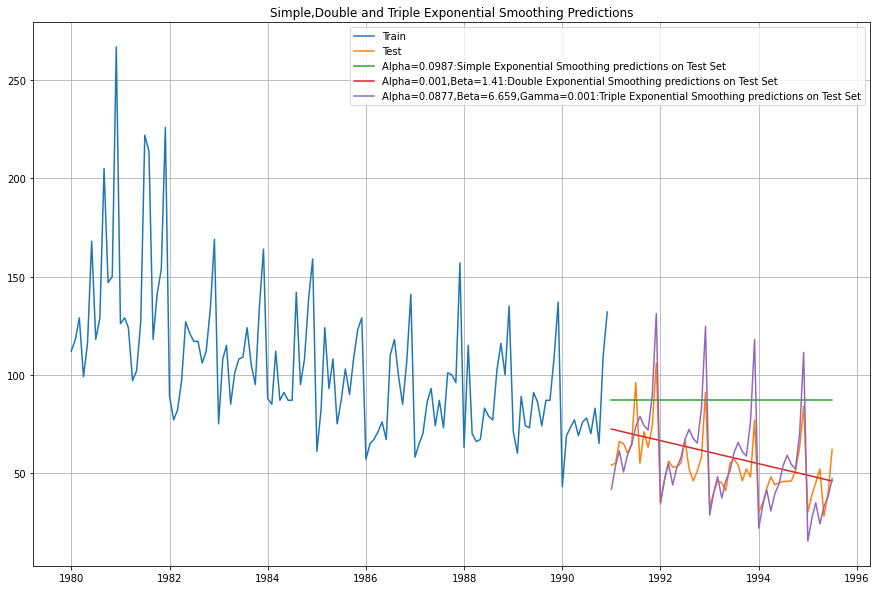

In [83]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0987:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.001,Beta=1.41:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0877,Beta=6.659,Gamma=0.001:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [84]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.377231326476302


In [85]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.0877,Beta=6.659,Gamma=0.001:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231


### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [86]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07336915185646381, 'smoothing_trend': 0.04366616789722176, 'smoothing_seasonal': 8.092476708185191e-05, 'damping_trend': nan, 'initial_level': 142.12276158556045, 'initial_trend': -0.8409491641808673, 'initial_seasons': array([0.79010014, 0.89594527, 0.9795284 , 0.85607407, 0.9627955 ,
       1.04820922, 1.15284393, 1.22759891, 1.16104173, 1.13748454,
       1.32592572, 1.82801267]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [87]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01     56.217768
1991-02-01     63.543963
1991-03-01     69.244346
1991-04-01     60.320222
1991-05-01     67.614328
1991-06-01     73.366320
1991-07-01     80.423166
1991-08-01     85.352578
1991-09-01     80.458459
1991-10-01     78.562716
1991-11-01     91.271164
1991-12-01    125.404001
1992-01-01     54.018911
1992-02-01     61.050428
1992-03-01     66.518207
1992-04-01     57.937607
1992-05-01     64.934779
1992-06-01     70.449187
1992-07-01     77.214813
1992-08-01     81.936217
1992-09-01     77.227214
1992-10-01     75.397011
1992-11-01     87.580977
1992-12-01    120.316648
1993-01-01     51.820054
1993-02-01     58.556892
1993-03-01     63.792067
1993-04-01     55.554991
1993-05-01     62.255231
1993-06-01     67.532053
1993-07-01     74.006461
1993-08-01     78.519856
1993-09-01     73.995970
1993-10-01     72.231305
1993-11-01     83.890790
1993-12-01    115.229294
1994-01-01     49.621196
1994-02-01     56.063356
1994-03-01     61.065927
1994-04-01     53.172376


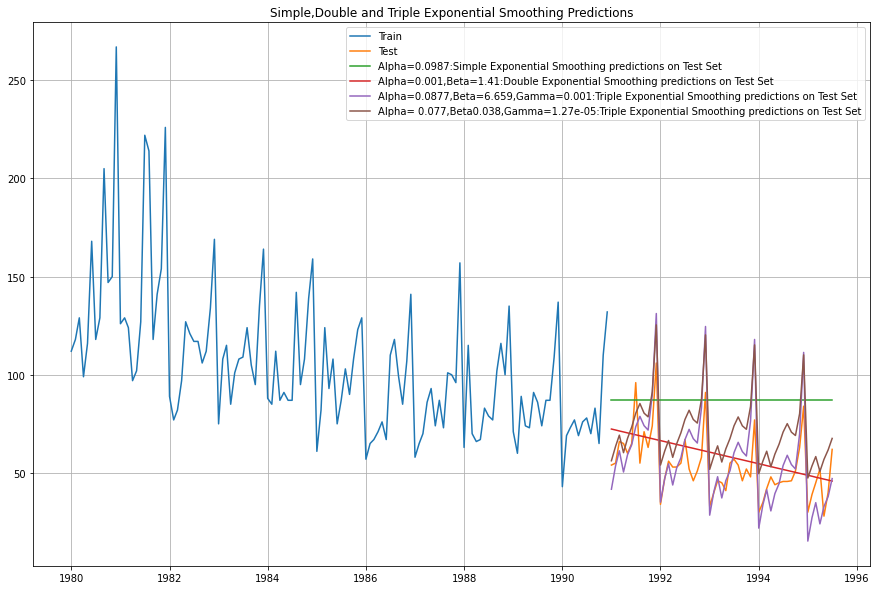

In [88]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0987:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.001,Beta=1.41:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0877,Beta=6.659,Gamma=0.001:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha= 0.077,Beta0.038,Gamma=1.27e-05:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [89]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 19.859708696795998


In [90]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.



## Linear Regression

In [91]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1183 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237]


In [92]:
LinearRegression_train = train.copy().to_frame()
LinearRegression_test = test.copy().to_frame()

In [93]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0  1183
1991-02-01  55.0  1184
1991-03-01  66.0  1185
1991-04-01  65.0  1186
1991-05-01  60.0  1187 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0  1233
1995-04-01  52.0  1234
1995-05-01  28.0  1235
1995-06-01  40.0  1236
1995-07-01  62.0  1237 



In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [98]:
# evaluate the model
from sklearn import metrics


In [99]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test.to_frame()['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 514.446


In [100]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709
RegressionOnTime,514.445957


## Naive forecast model

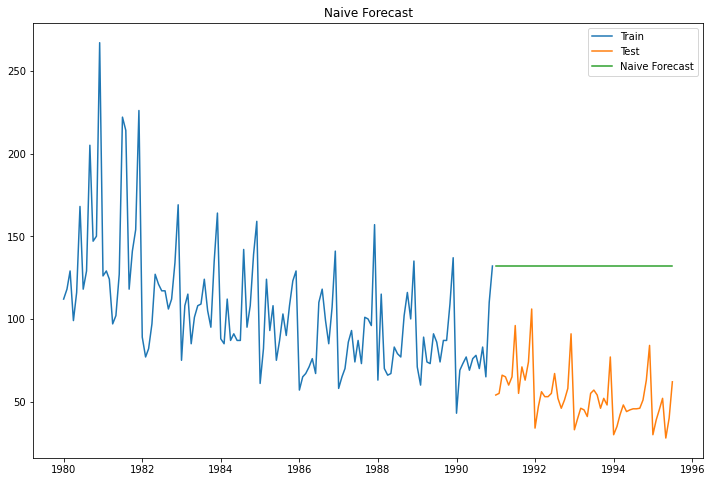

In [101]:
dd= np.asarray(train.to_frame()['Rose'])
y_hat = test.to_frame().copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train.to_frame()['Rose'], label='Train')
plt.plot(test.index,test.to_frame()['Rose'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [102]:

from math import sqrt
rms = sqrt(mean_squared_error(test.to_frame().Rose, y_hat.naive))
print(rms)

79.7121969421331


In [103]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rms]},index=['Naive forecast'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709
RegressionOnTime,514.445957
Naive forecast,79.712197


## Simple average

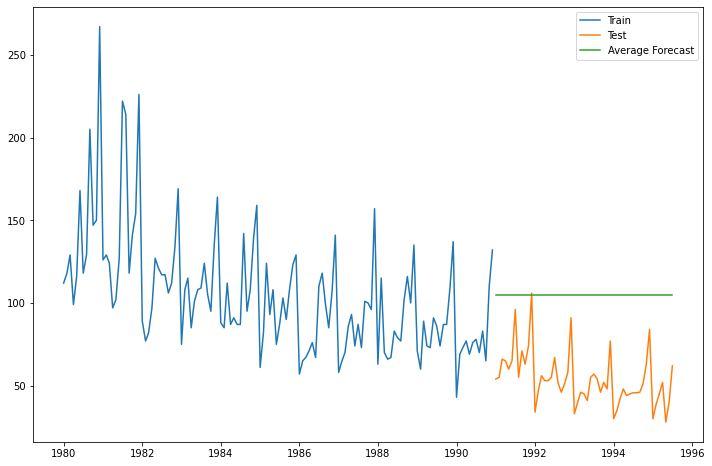

In [104]:
y_hat_avg = test.to_frame().copy()
y_hat_avg['avg_forecast'] = train.to_frame()['Rose'].mean()
plt.figure(figsize=(12,8))
plt.plot(train.to_frame()['Rose'], label='Train')
plt.plot(test.to_frame()['Rose'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [105]:
rms = sqrt(mean_squared_error(test.to_frame().Rose, y_hat_avg.avg_forecast))
print(rms)

53.45383080704171


In [106]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rms]},index=['Simple Avg'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709
RegressionOnTime,514.445957
Naive forecast,79.712197
Simple Avg,53.453831


# Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.


# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [107]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

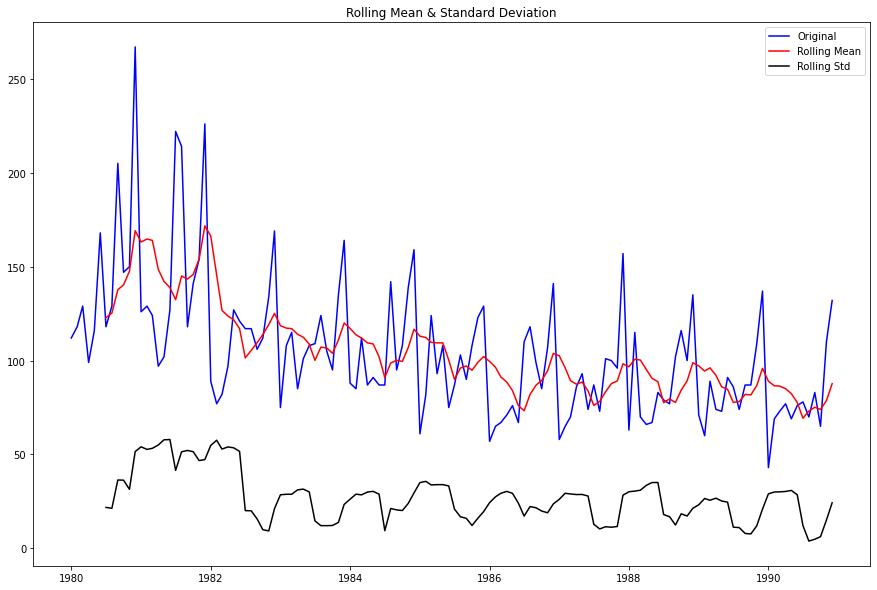

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [108]:
test_stationarity(train.to_frame()['Rose'])

we see that the time series is not stationay at  $\alpha$ = 0.05.

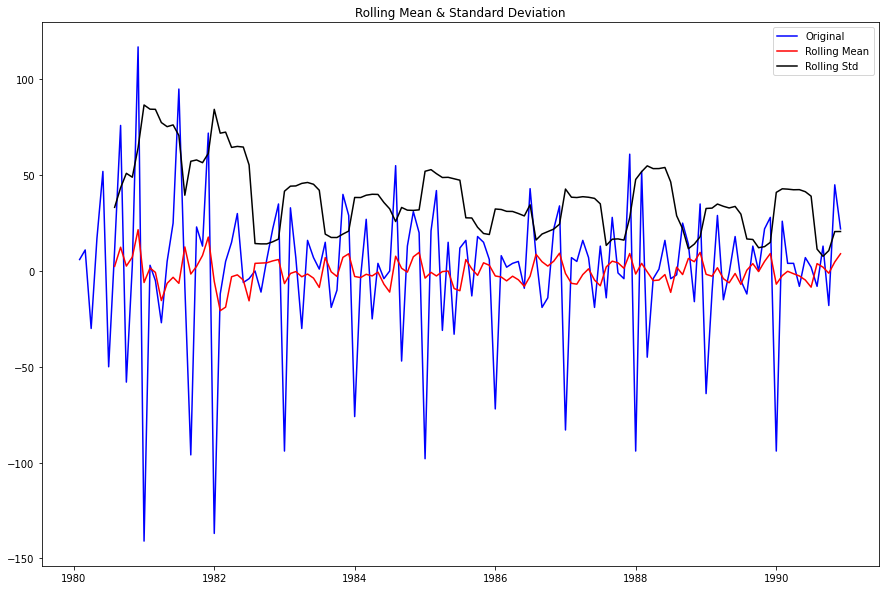

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [109]:
test_stationarity(train.to_frame()['Rose'].diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


We should build sarima model as the timeseries has seasonality

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

<Figure size 1080x720 with 0 Axes>

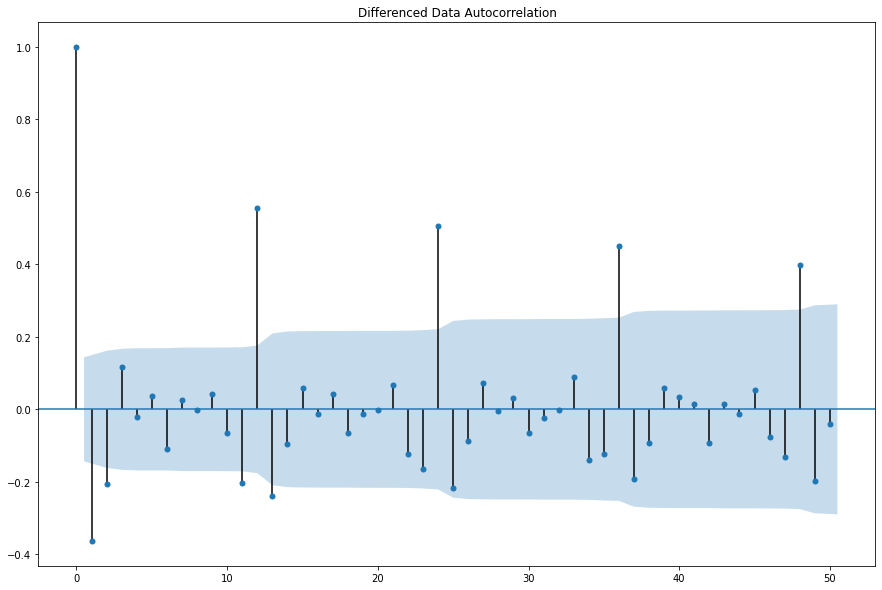

In [110]:
plt.clf()
plot_acf(df_1.to_frame()['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [111]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [112]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [113]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.to_frame()['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207398
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.43752963809
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386552
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751481
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697588
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945485
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383791
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918137
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947287
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483306797
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536177
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461674
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988258648915
SARIMA(0, 1, 2)x(0, 0, 

In [114]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686898
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [114]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.to_frame()['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Thu, 25 Mar 2021   AIC                            887.938
Time:                                    22:46:13   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.704     -0.004      0.996    -372.656     370.970
ma.L2         -0.1573     29.803   

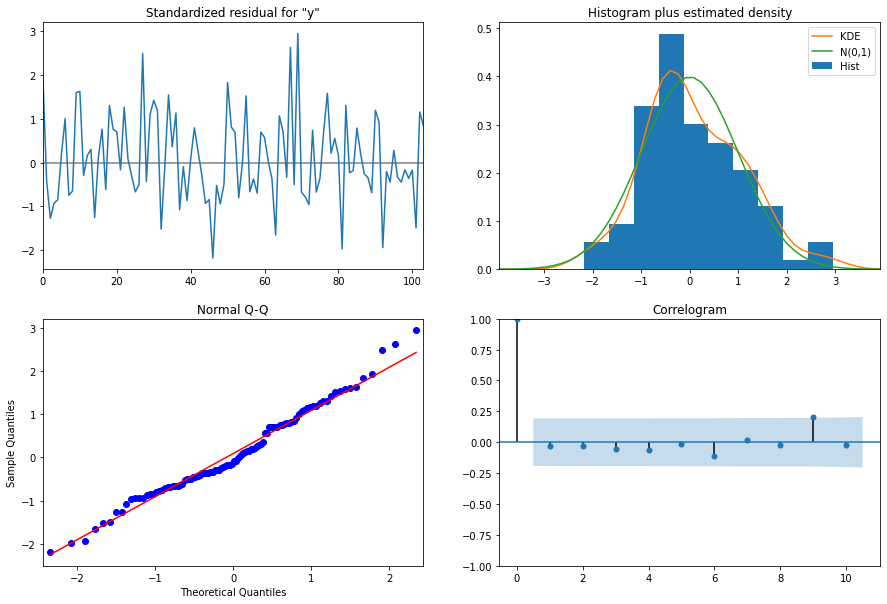

In [116]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [115]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [118]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928500,31.647976,94.086550
1,70.541190,16.147658,38.892361,102.190019
2,77.356410,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857638
4,72.747398,16.147656,41.098573,104.396222


In [116]:
auto_Sarima_12_pred=TES_predict_am.copy().to_frame()
#predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean']
auto_Sarima_12_pred['Pred']=predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean'].values
auto_Sarima_12_pred=auto_Sarima_12_pred.drop([0],axis=1)

In [117]:
rmse = mean_squared_error(test.to_frame()['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.92115562414702


In [121]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709
RegressionOnTime,514.445957
Naive forecast,79.712197
Simple Avg,53.453831
"SARIMA(0,1,2)(2,0,2,12)",26.921156


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

Let us look at the ACF and the PACF plots once more.

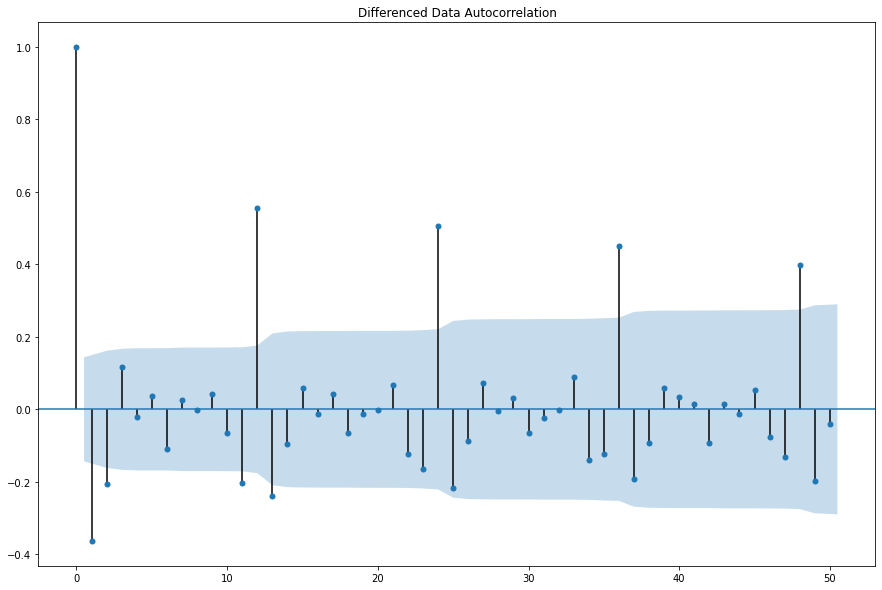

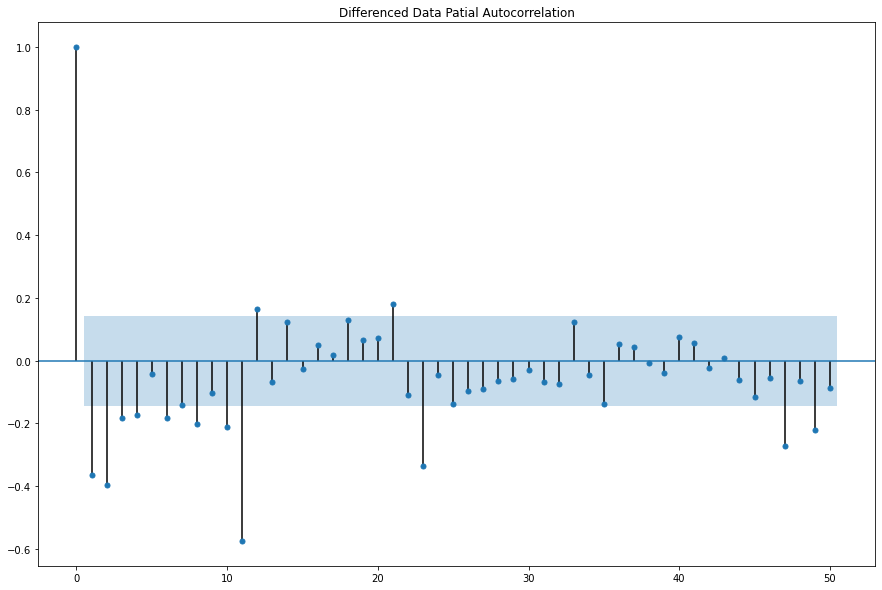

In [122]:
plot_acf(df_1.to_frame()['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1.to_frame()['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper 

---

off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

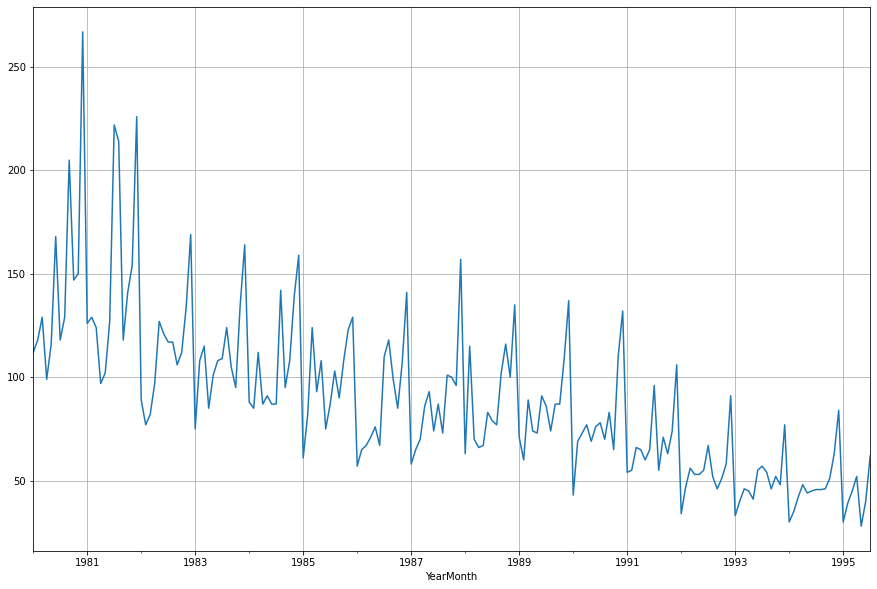

In [123]:
df_1.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

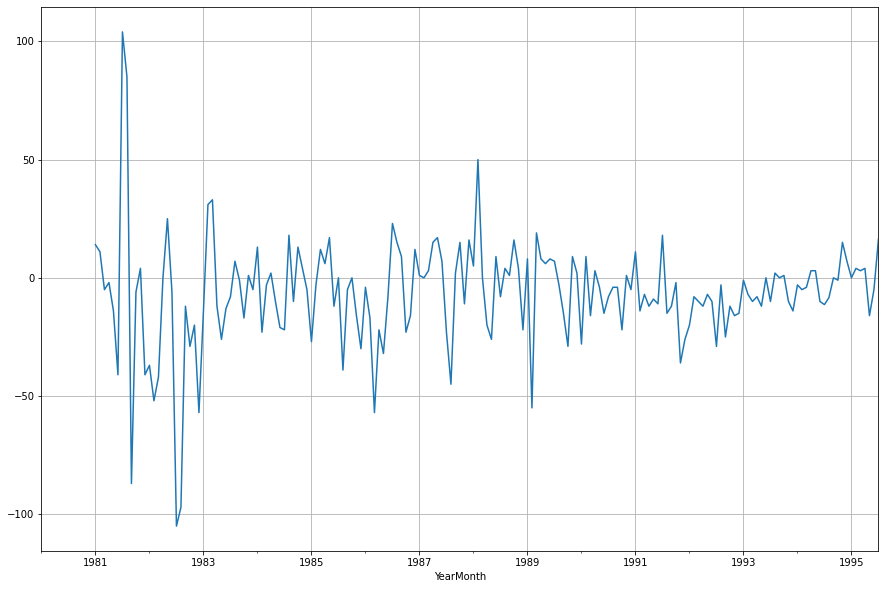

In [124]:
(df_1.to_frame()['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

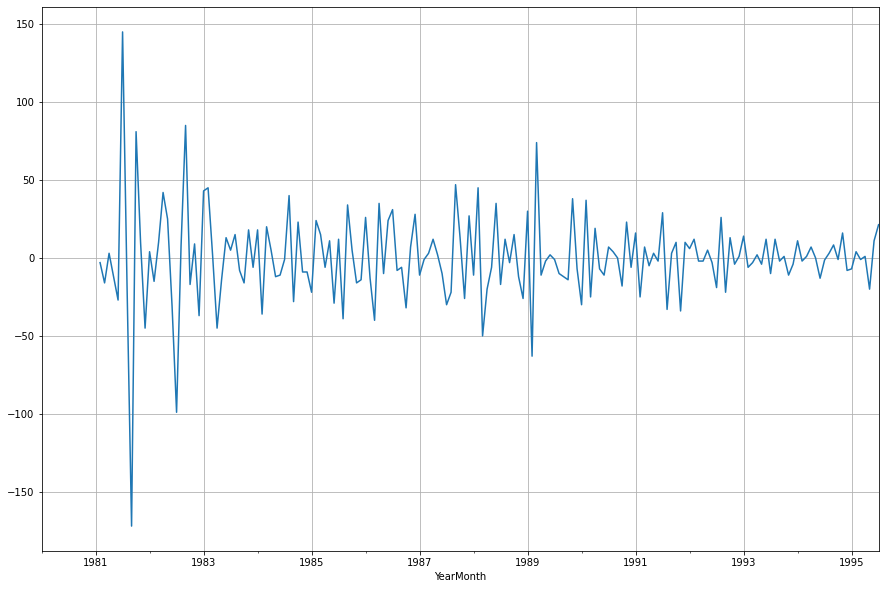

In [125]:
(df_1.to_frame()['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

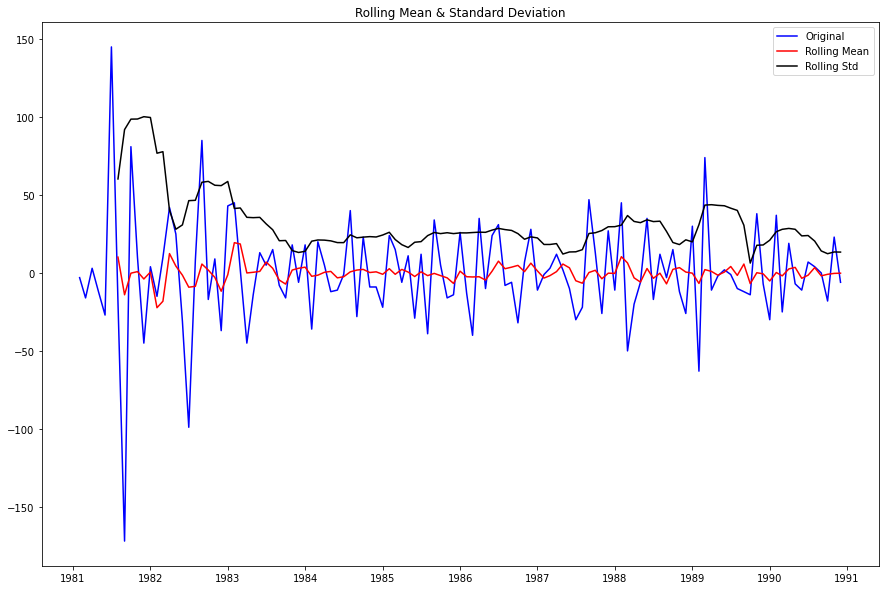

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [126]:
test_stationarity((train.to_frame()['Rose'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

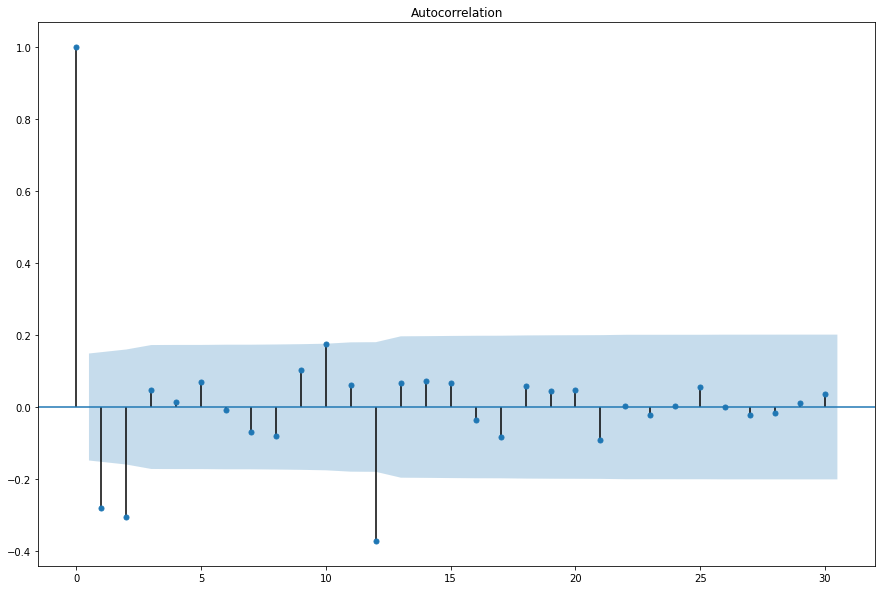

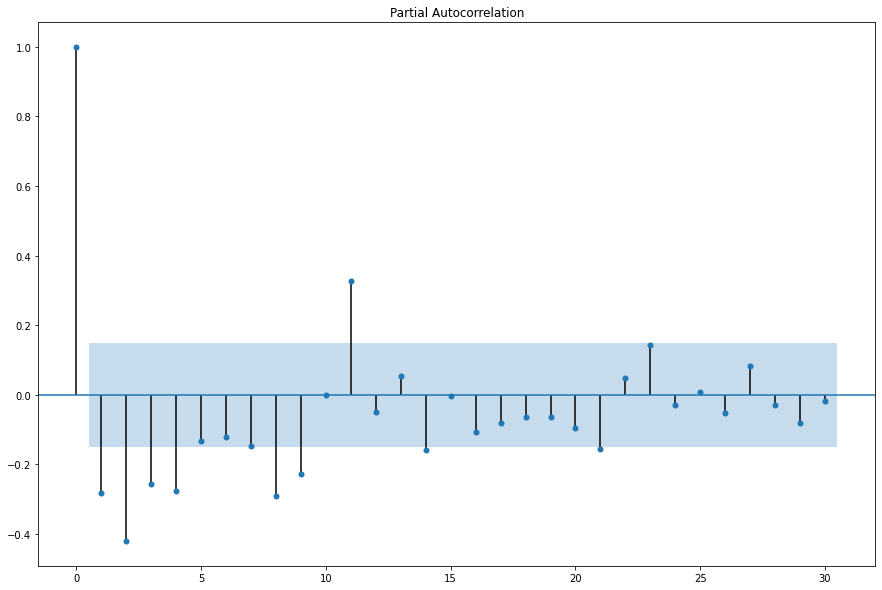

In [133]:
plot_acf((df_1.to_frame()['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_1.to_frame()['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

p=0 q=2 d=1
P=1 Q=0 D=1

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [119]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train.to_frame()['Rose'].values,
                                order=(0, 2, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -549.418
Date:                            Thu, 25 Mar 2021   AIC                           1106.836
Time:                                    22:46:14   BIC                           1117.850
Sample:                                         0   HQIC                          1111.307
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    593.083     -0.002      0.999   -1163.422    1161.422
ar.S.L12       0.8906      0.026   

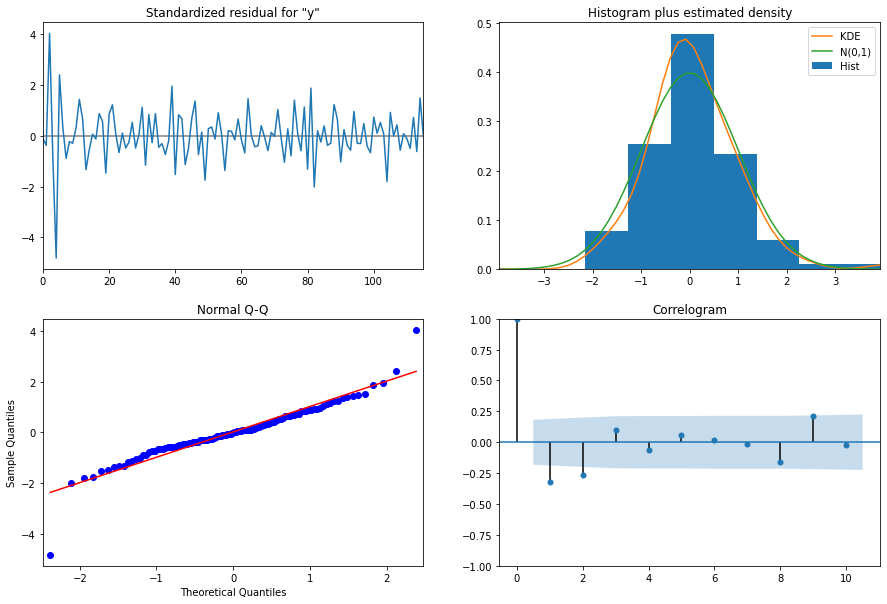

In [120]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [121]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [122]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,89.739864,25.334501,40.085154,139.394574
1,92.770601,36.196668,21.826436,163.714766
2,97.016187,44.837361,9.136574,184.895799
3,91.280508,52.367982,-11.358850,193.919867
4,97.546696,59.213585,-18.509797,213.603189


In [123]:
rmse = mean_squared_error(test.to_frame()['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

66.75205449111675


In [124]:
Manual_Sarima_12_pred=TES_predict_am.copy().to_frame()
#predicted_auto_SARIMA_12.summary_frame(alpha=0.05)['mean']
Manual_Sarima_12_pred['Pred']=predicted_manual_SARIMA_12.summary_frame(alpha=0.05)['mean'].values
Manual_Sarima_12_pred=Manual_Sarima_12_pred.drop([0],axis=1)

In [125]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_manual(0, 2, 1)(1,0,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha= 0.0987,SES",36.789387
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709
RegressionOnTime,514.445957
Naive forecast,79.712197
Simple Avg,53.453831
"SARIMA_manual(0, 2, 1)(1,0,1,12)",66.752054


# 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [126]:
resultsDf=resultsDf.sort_values("Test RMSE", axis = 0, ascending = True, na_position ='last')

In [127]:
resultsDf

,Test RMSE
"Alpha=0.0877,Beta=6.659,Gamma=0.001:TES",14.377231
"Alpha=0.001,Beta=1.41:DES",15.392517
"Alpha= 0.077,Beta0.038,Gamma=1.27e-05:TES_am",19.859709
"Alpha= 0.0987,SES",36.789387
Simple Avg,53.453831
"SARIMA_manual(0, 2, 1)(1,0,1,12)",66.752054
Naive forecast,79.712197
RegressionOnTime,514.445957


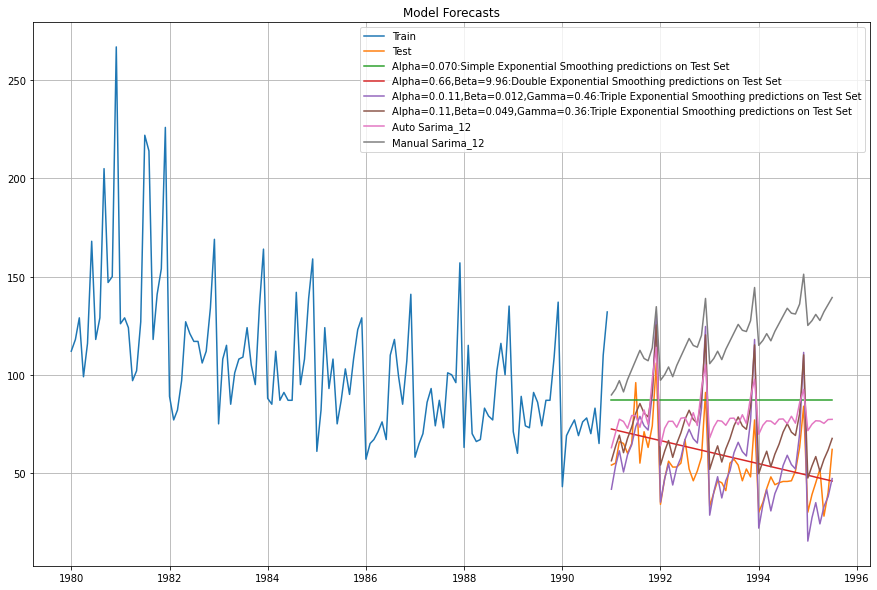

In [128]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=9.96:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.049,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')
plt.plot(auto_Sarima_12_pred,label='Auto Sarima_12')
plt.plot(Manual_Sarima_12_pred,label='Manual Sarima_12')





plt.legend(loc='best')
plt.grid()
plt.title('Model Forecasts');

We see that Triple Exponential Smoothing with Alpha=0.0.11,Beta=0.012,Gamma=0.46 has the best RMSE for the test data

From above table, it can be clearly concluded that triple exponential model with additive seasonality performed well than others. So it will be used for forcasting.


#9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [129]:
TES_predict_12 =  model_TES.forecast(len(test)+12)
future_12_months=TES_predict_12.tail(12)

In [130]:
future_12_months

1995-08-01     52.394014
1995-09-01     47.651581
1995-10-01     45.419486
1995-11-01     63.295763
1995-12-01    104.785677
1996-01-01      8.683727
1996-02-01     20.610648
1996-03-01     28.259845
1996-04-01     17.447829
1996-05-01     26.260600
1996-06-01     31.328056
1996-07-01     40.522589
Freq: MS, dtype: float64

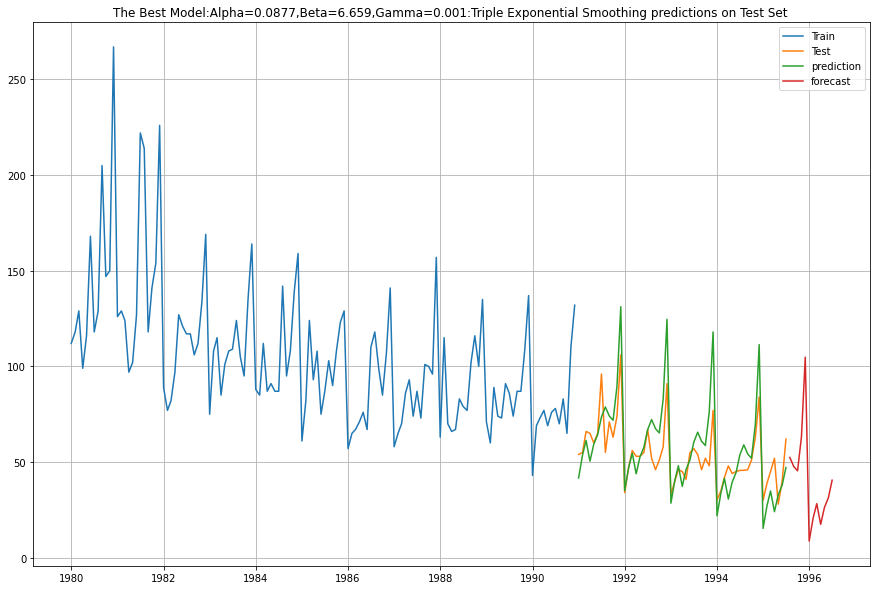

In [131]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(15,10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='prediction')
plt.plot(future_12_months, label='forecast')

plt.legend(loc='best')
plt.grid()
plt.title('The Best Model:Alpha=0.0877,Beta=6.659,Gamma=0.001:Triple Exponential Smoothing predictions on Test Set ');

In [132]:
future_12_months.to_frame().to_csv('12months_forecast',header=False)